In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
# define path
path = r'C:\Users\harip\Desktop\Data Analytics Project\Advanced Analytics & Dashboard Design\Exercise 6.2'

In [4]:
# import data
clean_data = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','clean_data.csv'),index_col = False)

In [5]:
clean_data.columns

Index(['Unnamed: 0', 'Company', 'Specific Bean Origin', 'REF', 'Review',
       'Cacao percent', 'Location', 'Rating', 'Bean type',
       'Broad Bean Origin'],
      dtype='object')

In [6]:
clean_data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
clean_data.head()

,Company,Specific Bean Origin,REF,Review,Cacao percent,Location,Rating,Bean type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Unknown,Peru


Text(0.5, 1.0, 'Correlation between Cacao % and Rating')

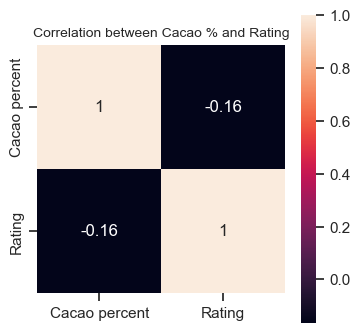

In [35]:
subset = clean_data[['Cacao percent', 'Rating']]

# Compute correlation
corr = subset.corr()
# Plot heatmap
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(corr, annot=True, ax=ax, cbar=True, square=True)
plt.title("Correlation between Cacao % and Rating", fontsize=10)

A heatmap was created to visualize the correlation coefficients between Cacao % and Rating. The correlation between Cacao % and Rating is -0.16, indicating a weak negative relationship—higher cacao content tends to slightly correspond with lower ratings. The diagonal values of 1 represent perfect self-correlation for each variable.

### Scatterplots

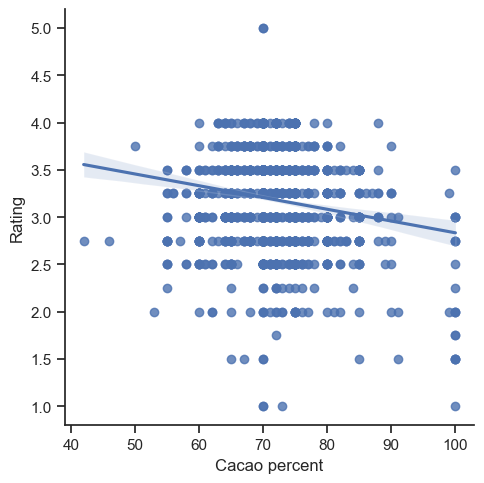

In [39]:
# create a scatterplot
sns.lmplot(x = 'Cacao percent', y = 'Rating', data = clean_data)

This analysis examines the relationship between cacao percentage and chocolate bar ratings. A scatter plot with a regression line shows a slight negative correlation, indicating that higher cacao content tends to receive slightly lower ratings.

### Pair Plots:

In [42]:
# Create a pair plot of the entire data set
sub_2 = clean_data[['REF', 'Review', 'Cacao percent', 'Rating']]

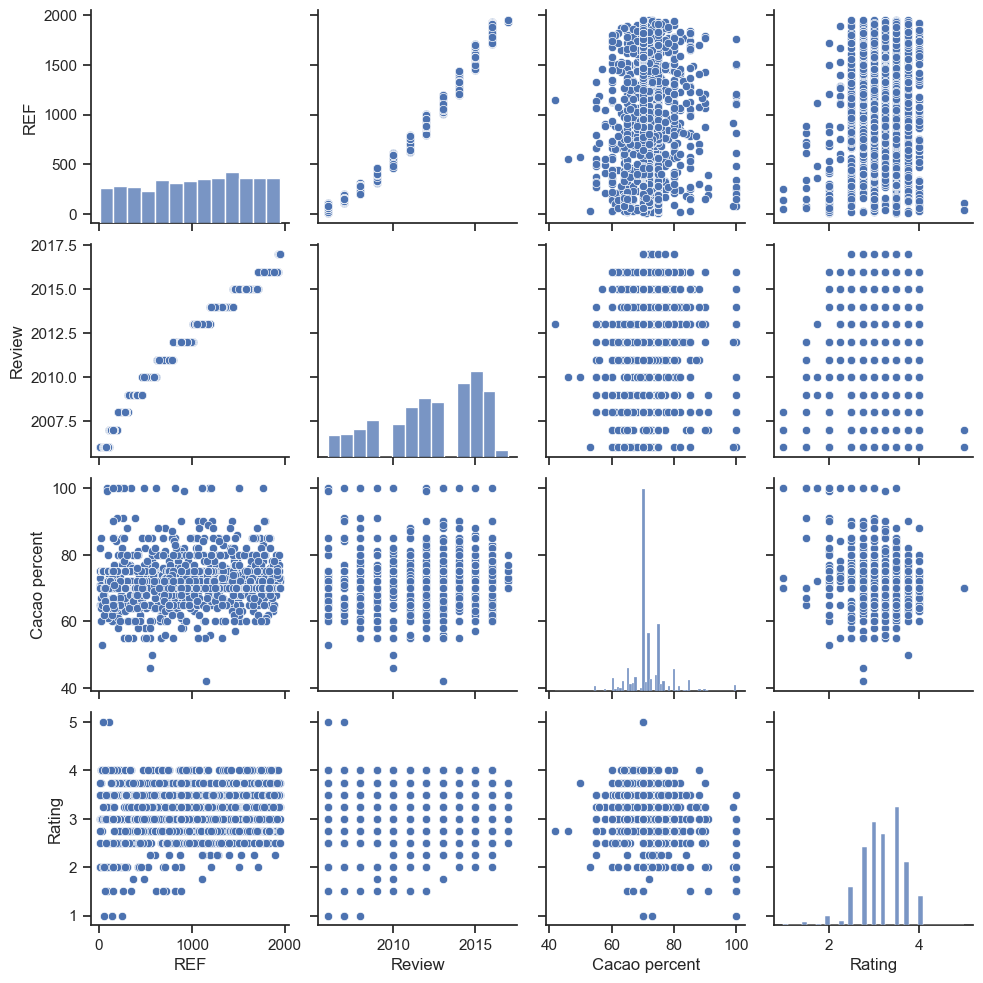

In [43]:
# Create a pair plot
g = sns.pairplot(sub_2)

Pair Plot (REF, Review, Cacao %, Rating):

REF and Review show a strong positive correlation, reflecting chronological consistency.

Cacao % and Rating do not exhibit a strong linear relationship, consistent with the scatter plot results.

Histograms reveal that most chocolate bars have around 70% cacao, and ratings are generally clustered near 3.

### Categorical Plots:

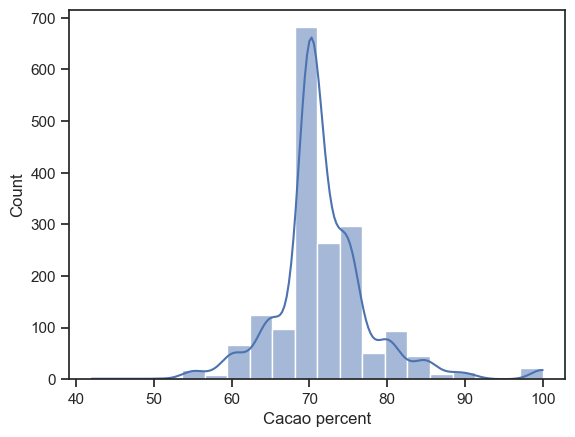

In [45]:
# Create a histogram
sns.histplot(clean_data['Cacao percent'], bins = 20, kde = True)
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations','histogram.png'))

Cacao Percentage Distribution:

The histogram and density curve show that most chocolates cluster around 70% cacao, with values ranging from 40% to 100%. The distribution is roughly bell-shaped, indicating a central tendency toward moderately dark chocolate.

In [9]:
clean_data['Cacao percent'].describe()

count    1795.000000
mean       71.697493
std         6.323706
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: Cacao percent, dtype: float64

In [29]:
# Define the categories
result = []

for value in clean_data['Cacao percent']:
    if 42 <= value <= 60:
        result.append("Low Cacao")
    elif 61 <= value <= 80:
        result.append("Medium Cacao")
    else:
        result.append("High Cacao")

clean_data['Cacao Category'] = result

In [30]:
clean_data.head()

,Company,Specific Bean Origin,REF,Review,Cacao percent,Location,Rating,Bean type,Broad Bean Origin,Cacao Category
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Unknown,Sao Tome,Medium Cacao
1,A. Morin,Kpime,1676,2015,70,France,2.75,Unknown,Togo,Medium Cacao
2,A. Morin,Atsane,1676,2015,70,France,3.00,Unknown,Togo,Medium Cacao
3,A. Morin,Akata,1680,2015,70,France,3.50,Unknown,Togo,Medium Cacao
4,A. Morin,Quilla,1704,2015,70,France,3.50,Unknown,Peru,Medium Cacao


### Count plot of chocolates by Cacao Category

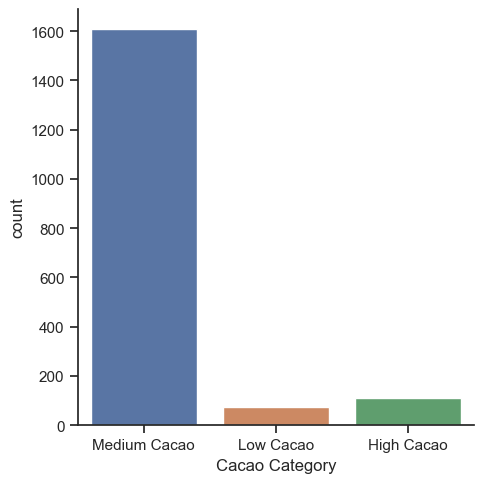

In [46]:
sns.set(style="ticks")
g = sns.catplot(x="Cacao Category", kind="count", hue="Cacao Category", data=clean_data)
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Cacao_category_count.png'))

Cacao Category Distribution:

The bar chart shows that Medium Cacao dominates (1,600 items), while Low and High Cacao are much less common (<200 each), with High Cacao slightly more than Low. This suggests a market preference for moderately flavored chocolate.

### Ratings across Cacao Categories

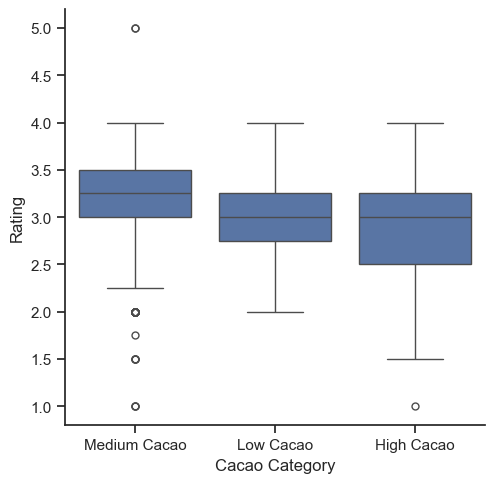

In [48]:
sns.catplot(
    data=clean_data,
    x='Cacao Category',
    y='Rating',
    kind='box'
)
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations','Cacao_category_rating.png'))

Chocolate Ratings by Cacao Category:
The box plot compares ratings across three cacao categories: Medium, Low, and High Cacao. Key points:

Median Ratings: All categories have similar medians around 3.0–3.3, indicating generally consistent consumer satisfaction.

Variability: Medium Cacao has a slightly narrower interquartile range, suggesting more consistent ratings. Low and High Cacao show wider spreads, with High Cacao exhibiting the most variation.

Outliers: Medium Cacao has several low-rating outliers near 1.0. High Cacao shows both low and high outliers, reflecting more polarized opinions. Low Cacao has minimal outliers.

### Distribution of Ratings by Location

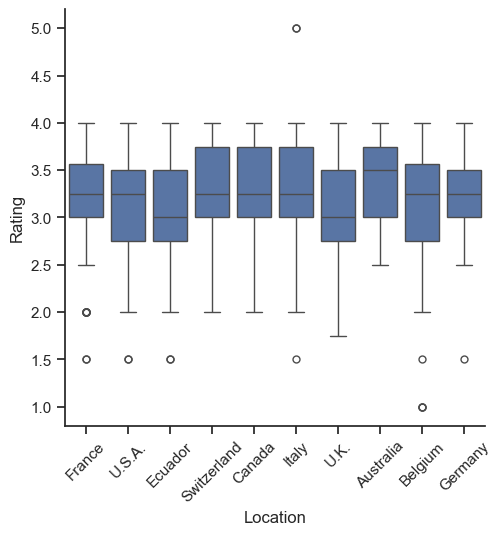

In [49]:
top_locations = clean_data['Location'].value_counts().head(10).index
sns.catplot(data=clean_data[clean_data['Location'].isin(top_locations)],
            x='Location', y='Rating', kind='box')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path,'04 Analysis', 'Visualizations','rating_by_location.png'))

This box plot shows chocolate ratings across ten countries. Switzerland, Canada, and the U.K. have the highest median ratings (3.4), while Ecuador and Italy also perform well (3.3) with consistent ratings. Germany and the U.S.A. show more variability and outliers, indicating mixed consumer experiences.

### New Questions Based on Early Findings

How does cacao percentage interact with bean origin in affecting ratings?

Are high-rating chocolates concentrated in certain regions or brands?

Does the frequency of certain bean types correspond to higher ratings?

### Hypotheses

1. Chocolates with medium cacao percentages (around 50–70%) receive higher consumer ratings than very low or very high cacao percentages.

2. Chocolates from Switzerland, Canada, and the U.K. are rated higher on average than those from Germany or the U.S.A.